In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

<h5>Loading contents of Boston Dataset<h5>

In [20]:
boston = load_boston()

# Print the dataset content
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\Private\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        t

<h5>Creating a Dataframe containing Boston Datset</h5>

In [21]:
# Create a pandas DataFrame with the dataset
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


<h5>Finding Self Correlation of the Data Feature upto 2 Decimal Places</h5>

In [22]:
# Calculate the self-correlation of the data features
correlations = boston_df.corr().round(2)

# Print the self-correlation table
print(correlations)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

<h5>Determining Variables with minimum and Maximum</h5>

In [23]:
# Find the variables with minimum and maximum self-correlation values
min_corr_var = correlations.idxmin().values[0]
max_corr_var = correlations.idxmax().values[0]

# Use the minimum and maximum correlated variables as training variables
X = boston_df[[min_corr_var, max_corr_var]]
y = boston.target

# Print the names of the training variables
print(f"Training variables: {min_corr_var}, {max_corr_var}")

Training variables: B, CRIM


<h5>Using 70:30  split ratio creating (x_train,y_train) and test(x_split,y_split) dataset<br>Acessing train_test_split from sklearn.model selection<h5>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and test datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (354, 2)
y_train shape: (354,)
X_test shape: (152, 2)
y_test shape: (152,)


<h5>Using Linear Regression model to train it using (x_train) and the predict feature to predict(y_pred)</h5>

In [25]:
lr_model= LinearRegression()
lr_model.fit(X_train,y_train)
y_pred= lr_model.predict(X_test)
print(y_pred)

[ 25.09003728  25.13726238  24.95098518  24.97583646  23.08026205
  24.54300217  24.89123339  24.83560507  23.70351961  25.07844228
  25.1182616   24.84383492   1.45258124  24.8758995   24.91396744
  22.97640283  24.68644364  19.53984086  25.08573424  21.88956597
  25.10025202  25.12908767  23.84672224  25.01287938  20.78278686
  21.23236182  25.1067467   12.11195178  25.00507422  25.06303152
  25.10829714  25.09832918  18.28904707  23.46775858  21.97504924
  21.04524601  25.04616549  25.1450273   24.7216401   24.59749574
  25.05559933  25.13975612  24.99193569  25.10955802  25.02313904
  22.65709327  23.80455118  24.79830265  23.63388959  25.15481664
  25.11588694  25.02781248  24.72536412  25.08413405  24.8034421
  23.66424901  23.14229604  25.14476462  25.13931131  24.89661452
  25.07986807  25.12829417  24.59010353  22.18989359  24.47903188
  25.00442507  21.98157091  25.14421473  25.11574131  13.90340318
  25.0910581   23.0624378   16.78063242  24.6004706   24.87911749
  11.724515

<h5>Determining MSE and RMSE and R2 score of theregression and performance<h5>

In [26]:
#mean squared error
mse= mean_squared_error(y_test,y_pred)
#root mean squared error
rmse= np.sqrt(mse)
#r2 score
r2=r2_score(y_test,y_pred)
# Print the performance metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error (MSE): 63.27
Root Mean Squared Error (RMSE): 7.95
R2 Score: 0.15


<h5>Training a Ridge Regression Model for the Boston Dataset<h5>

In [27]:
alpha_values = np.arange(0, 101, 5)  

mse_scores = []  
rmse_scores = []  
r2_scores = [] 

for alpha in alpha_values:
    # Create a Ridge Regression model with the current alpha value
    ridge = Ridge(alpha=alpha)
    # Fit the model using the training data
    ridge.fit(X_train, y_train)
    # Make predictions using the test data
    y_pred = ridge.predict(X_test)
    # Calculate the mean squared error, root mean squared error, and R2 score for the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
print(f"Alpha value: {alpha}")
print(f"RMSE score: {rmse:.8f}")
print(f"R2 score: {r2:.8f}")
print("-----------------------")

# print lists of performance scores
print("RMSE Scores:", rmse_scores)
print("R2 Scores:", r2_scores)

Alpha value: 100
RMSE score: 7.95290214
R2 score: 0.15117401
-----------------------
RMSE Scores: [7.954039194291968, 7.953981621552053, 7.953924125106421, 7.953866704870324, 7.95380936075912, 7.9537520926882666, 7.953694900573335, 7.953637784329989, 7.9535807438740065, 7.953523779121263, 7.95346688998774, 7.953410076389522, 7.9533533382427954, 7.953296675463852, 7.953240087969086, 7.953183575674995, 7.953127138498176, 7.953070776355332, 7.95301448916327, 7.952958276838894, 7.952902139299214]
R2 Scores: [0.1509312688974377, 0.15094356027169897, 0.1509558352688778, 0.15096809390742005, 0.15098033620574847, 0.15099256218226265, 0.15100477185533812, 0.1510169652433282, 0.15102914236456244, 0.15104130323734744, 0.15105344787996666, 0.15106557631068052, 0.15107768854772685, 0.15108978460931943, 0.15110186451365015, 0.15111392827888726, 0.1511259759231769, 0.15113800746464134, 0.15115002292138058, 0.15116202231147213, 0.1511740056529699]


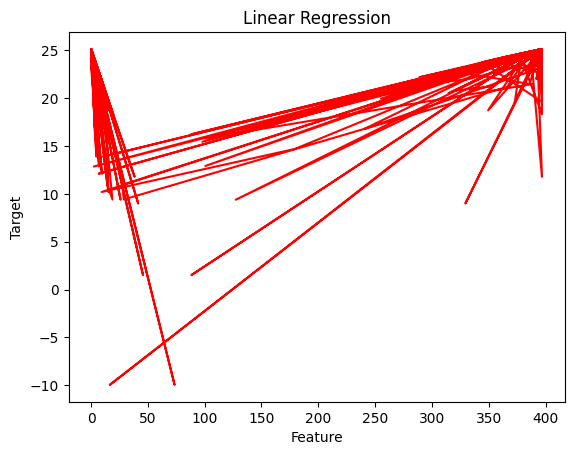

In [28]:

# Plot the predicted values for the test data
plt.plot(X_test, y_pred, color='red')

# Add labels to the plot
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [29]:
alphas = np.arange(0, 105, 5)

rmse_list_lasso = []
r2_list_lasso = []

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    y_pred_lasso = lasso_reg.predict(X_test)

    rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
    r2score_lasso = r2_score(y_test, y_pred_lasso)

    rmse_list_lasso.append(rmse_lasso.round(2))
    r2_list_lasso.append(r2score_lasso.round(2))

print("RMSE List for Lasso Regression: ", rmse_list_lasso)
print("R2 List for Lasso Regression: ", r2_list_lasso)

RMSE List for Lasso Regression:  [7.95, 7.92, 7.93, 7.99, 8.11, 8.19, 8.19, 8.19, 8.19, 8.19, 8.2, 8.2, 8.2, 8.21, 8.21, 8.21, 8.22, 8.23, 8.23, 8.24, 8.25]
R2 List for Lasso Regression:  [0.15, 0.16, 0.16, 0.14, 0.12, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]


C:\Users\Private\AppData\Local\Temp\ipykernel_8996\1609280868.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train, y_train)
C:\Users\Private\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Private\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+04, tolerance: 3.112e+00 Linear regression models with nu

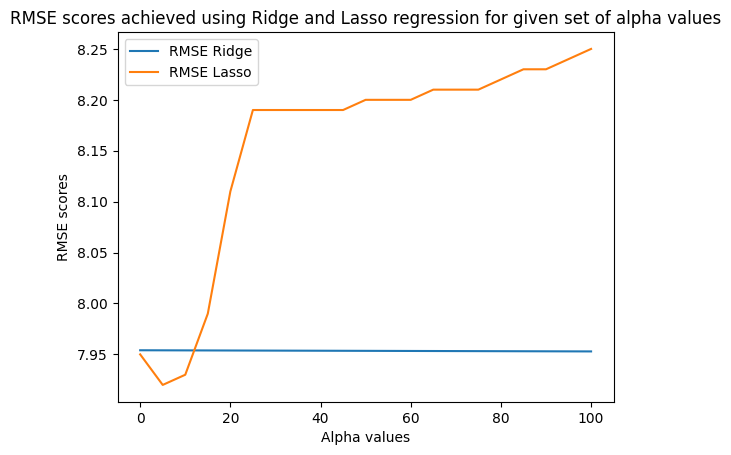

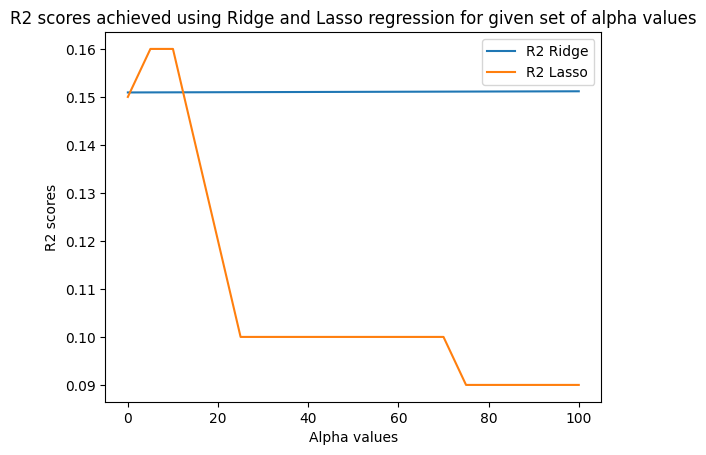

In [30]:
plt.plot(alphas, rmse_scores, label='RMSE Ridge')
plt.plot(alphas, rmse_list_lasso, label='RMSE Lasso')
plt.xlabel('Alpha values')
plt.ylabel('RMSE scores')
plt.title('RMSE scores achieved using Ridge and Lasso regression for given set of alpha values')
plt.legend()
plt.show()

plt.plot(alphas, r2_scores, label='R2 Ridge')
plt.plot(alphas, r2_list_lasso, label='R2 Lasso')
plt.xlabel('Alpha values')
plt.ylabel('R2 scores')
plt.title('R2 scores achieved using Ridge and Lasso regression for given set of alpha values')
plt.legend()
plt.show()

In [31]:
l1_ratios = np.arange(0, 1.1, 0.1)

rmse_list_en = []
r2_list_en = []

for l1_ratio in l1_ratios:
    en_reg = ElasticNet(l1_ratio=l1_ratio)
    en_reg.fit(X_train, y_train)
    y_pred_en = en_reg.predict(X_test)

    rmse_en = mean_squared_error(y_test, y_pred_en, squared=False)
    r2score_en = r2_score(y_test, y_pred_en)

    rmse_list_en.append(rmse_en.round(2))
    r2_list_en.append(r2score_en.round(2))

print("RMSE List for ElasticNet Regression: ", rmse_list_en)
print("R2 List for ElasticNet Regression: ", r2_list_en)

RMSE List for ElasticNet Regression:  [7.95, 7.95, 7.95, 7.95, 7.95, 7.95, 7.95, 7.94, 7.94, 7.94, 7.94]
R2 List for ElasticNet Regression:  [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]


C:\Users\Private\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+04, tolerance: 3.112e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


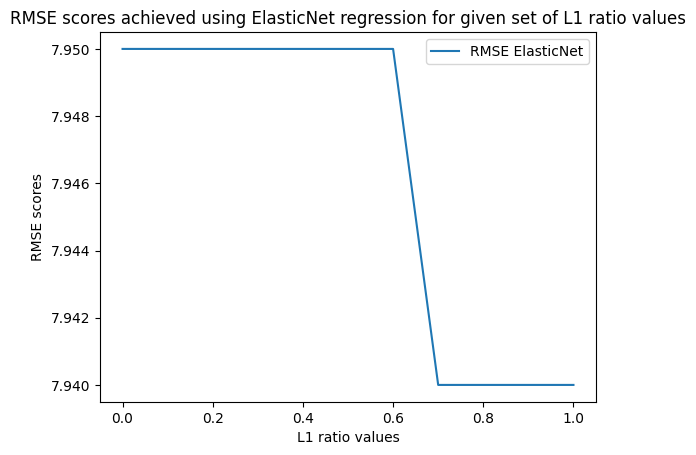

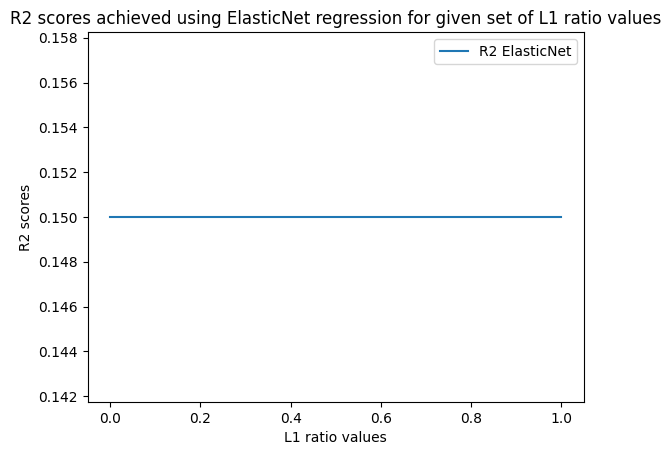

In [32]:
plt.plot(l1_ratios, rmse_list_en, label='RMSE ElasticNet')
plt.xlabel('L1 ratio values')
plt.ylabel('RMSE scores')
plt.title('RMSE scores achieved using ElasticNet regression for given set of L1 ratio values')
plt.legend()
plt.show()

plt.plot(l1_ratios, r2_list_en, label='R2 ElasticNet')
plt.xlabel('L1 ratio values')
plt.ylabel('R2 scores')
plt.title('R2 scores achieved using ElasticNet regression for given set of L1 ratio values')
plt.legend()
plt.show()